# Explore here

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import requests

In [36]:
import pandas as pd

# Intentar cargar los datos especificando el delimitador y el caracter de comillas
bank_marketing = pd.read_csv(
    "https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv",
    sep=';', 
    quotechar='"'
)


print(bank_marketing.head().to_markdown())



|    |   age | job       | marital   | education   | default   | housing   | loan   | contact   | month   | day_of_week   |   duration |   campaign |   pdays |   previous | poutcome    |   emp.var.rate |   cons.price.idx |   cons.conf.idx |   euribor3m |   nr.employed | y   |
|---:|------:|:----------|:----------|:------------|:----------|:----------|:-------|:----------|:--------|:--------------|-----------:|-----------:|--------:|-----------:|:------------|---------------:|-----------------:|----------------:|------------:|--------------:|:----|
|  0 |    56 | housemaid | married   | basic.4y    | no        | no        | no     | telephone | may     | mon           |        261 |          1 |     999 |          0 | nonexistent |            1.1 |           93.994 |           -36.4 |       4.857 |          5191 | no  |
|  1 |    57 | services  | married   | high.school | unknown   | no        | no     | telephone | may     | mon           |        149 |          1 |     999 |          

In [37]:
bank_marketing.to_csv('bank-marketing-campaign-data.csv', index=False)
print(df.shape)


(41188, 21)


In [38]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [39]:
df = bank_marketing.data.features

In [40]:
df['y']= y

In [41]:
df.shape

(45211, 17)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [44]:
df = df.drop_duplicates()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [46]:
df2 = df.drop(['contact', 'month','day_of_week'], axis = 1, inplace = False)

In [47]:
df.shape

(45211, 17)

Analisis de variables univarieante

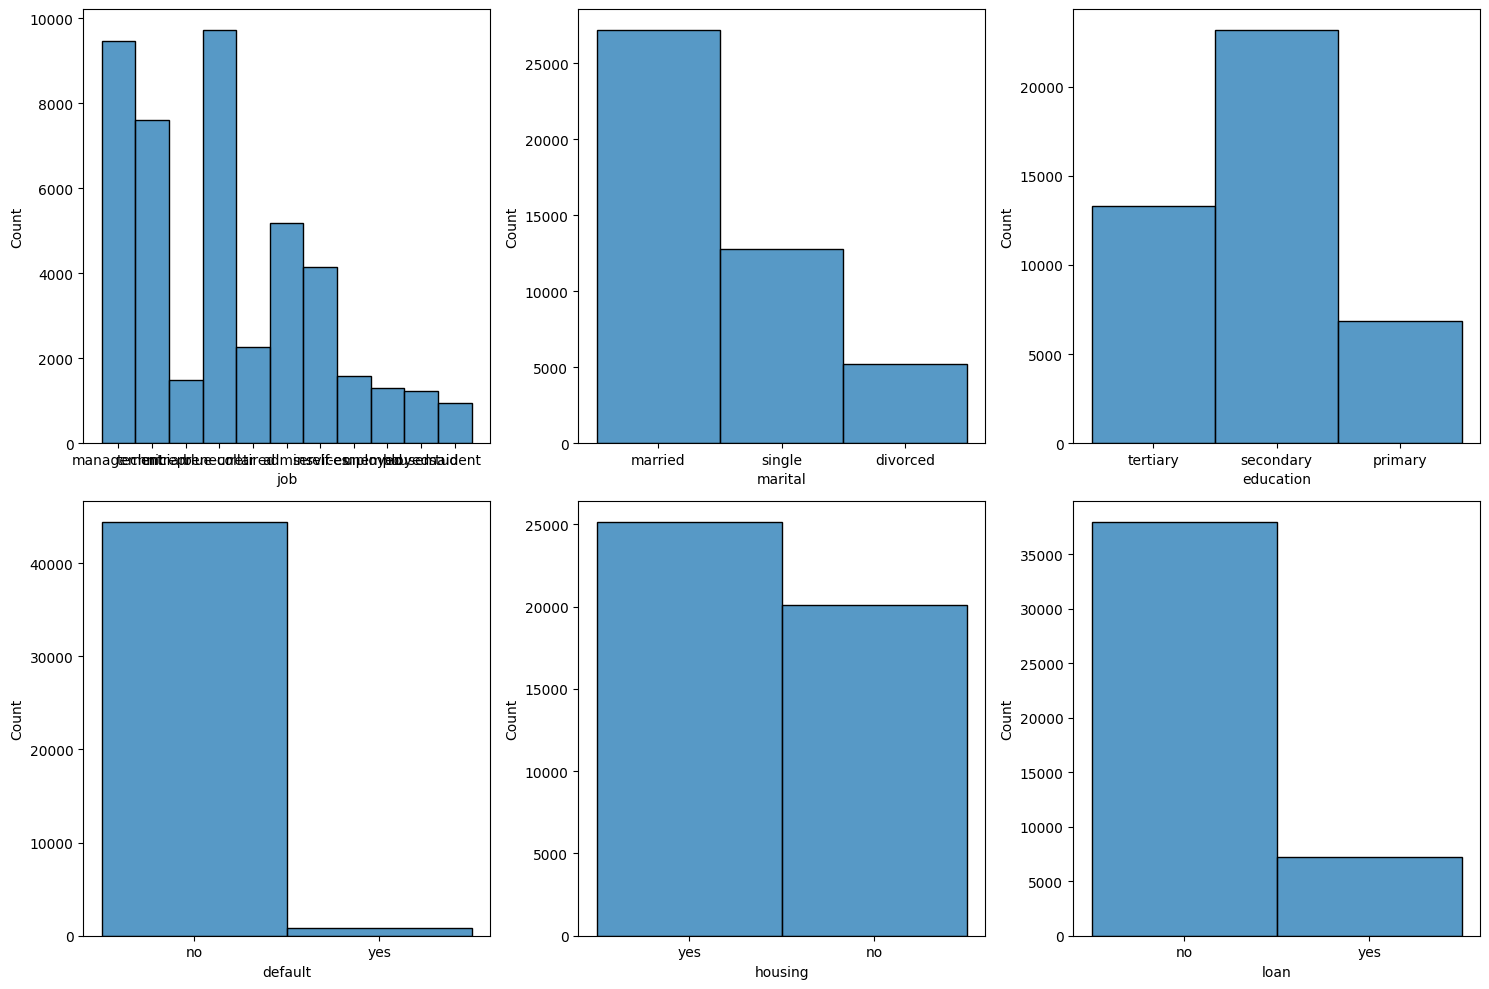

In [ ]:


fig, axis = plt.subplots(2, 3, figsize=(15, 10))


sns.histplot(ax=axis[0, 0], data=df2, x='job')
sns.histplot(ax=axis[0, 1], data=df2, x='marital')
sns.histplot(ax=axis[0, 2], data=df2, x='education')
sns.histplot(ax=axis[1, 0], data=df2, x='default')
sns.histplot(ax=axis[1, 1], data=df2, x='housing')
sns.histplot(ax=axis[1, 2], data=df2, x='loan')


plt.tight_layout()
plt.show()


<Axes: xlabel='previous'>

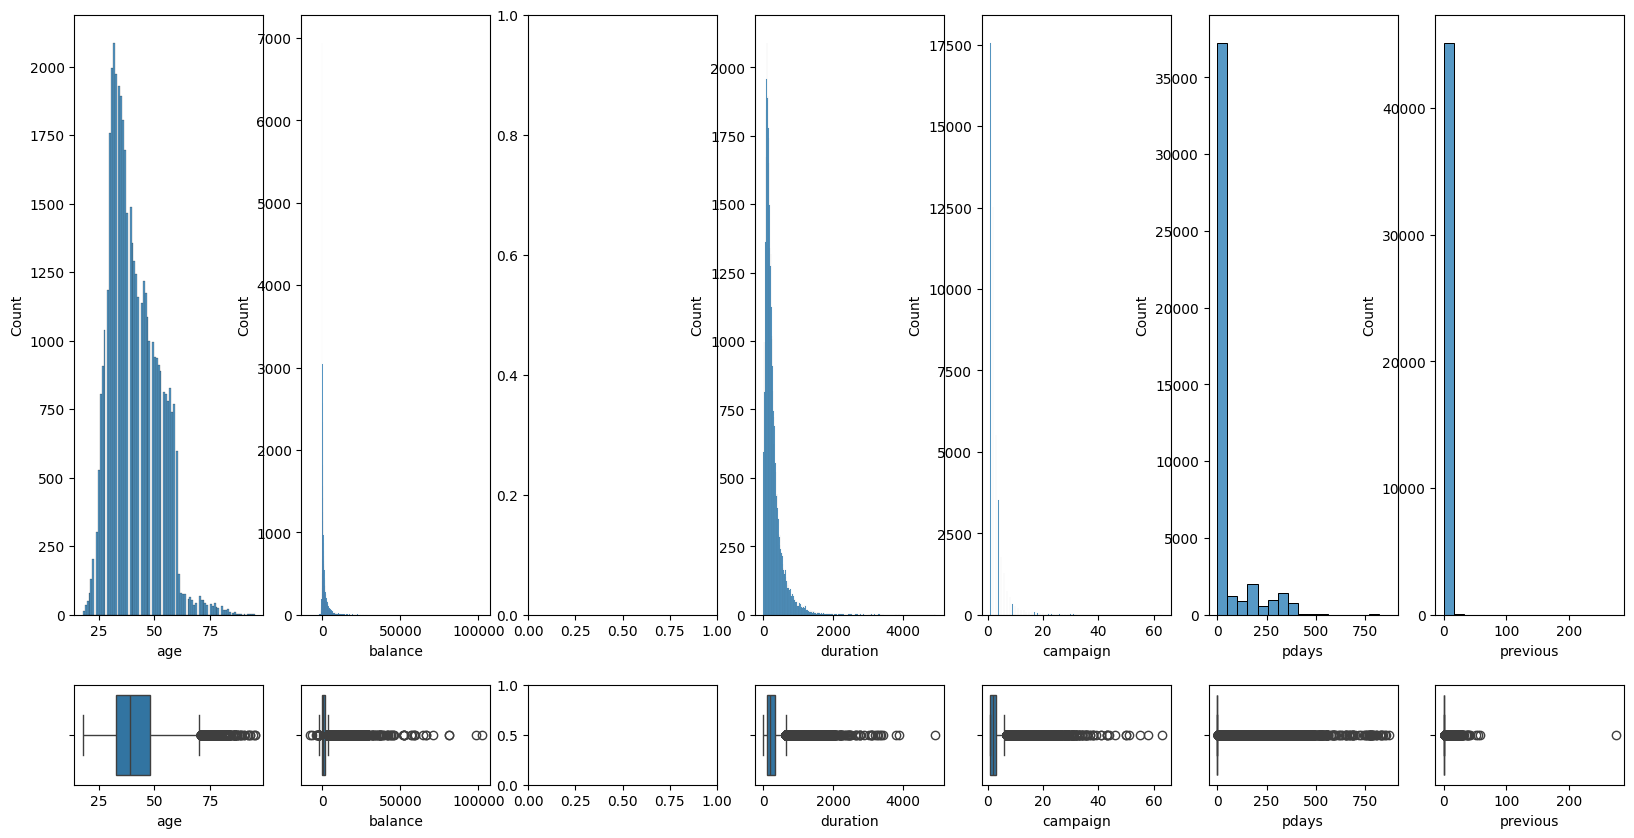

In [54]:
fig, axis = plt.subplots(2, 7, figsize = (20, 10), gridspec_kw={'height_ratios': [6, 1]})

sns.histplot (ax = axis [0, 0], data = df2, x = 'age')
sns.boxplot (ax = axis [1, 0], data = df2, x = 'age')
sns.histplot (ax = axis [0, 1], data = df2, x = 'balance')
sns.boxplot (ax = axis [1, 1], data = df2, x = 'balance')
#sns.histplot (ax = axis [0, 2], data = df2, x = 'day_of_week')
#sns.boxplot (ax = axis [1, 2], data = df2, x = 'day_of_week')
sns.histplot (ax = axis [0, 3], data = df2, x = 'duration')
sns.boxplot (ax = axis [1, 3], data = df2, x = 'duration')
sns.histplot (ax = axis [0, 4], data = df2, x = 'campaign')
sns.boxplot (ax = axis [1, 4], data = df2, x = 'campaign')
sns.histplot (ax = axis [0, 5], data = df2, x = 'pdays')
sns.boxplot (ax = axis [1, 5], data = df2, x = 'pdays')
sns.histplot (ax = axis [0, 6], data = df2, x = 'previous')
sns.boxplot (ax = axis [1, 6], data = df2, x = 'previous')

In [55]:
round(df2.describe(),2)

,age,balance,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,258.16,2.76,40.20,0.58
std,10.62,3044.77,257.53,3.10,100.13,2.30
min,18.00,-8019.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,4918.00,63.00,871.00,275.00


In [56]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [57]:
df2["y"] = pd.factorize(df2["y"])[0]

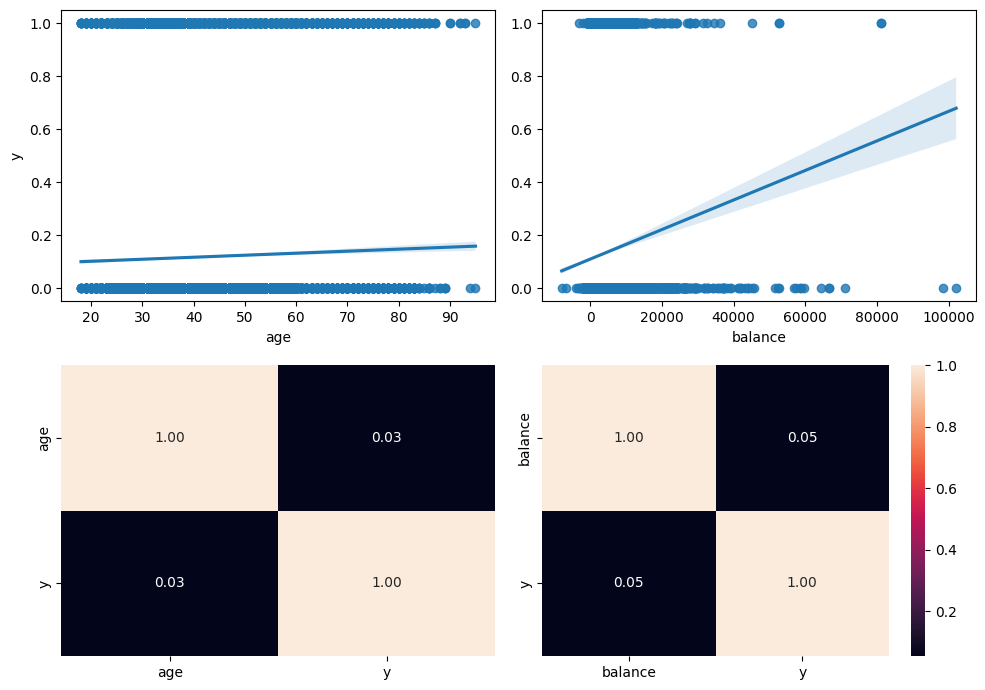

In [58]:
# Crear un diagrama de dispersión múltiple
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df2, x = "age", y = "y")
sns.heatmap(df2[["age", "y"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df2, x = "balance", y = "y").set(ylabel=None)
sns.heatmap(df2[["balance", "y"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

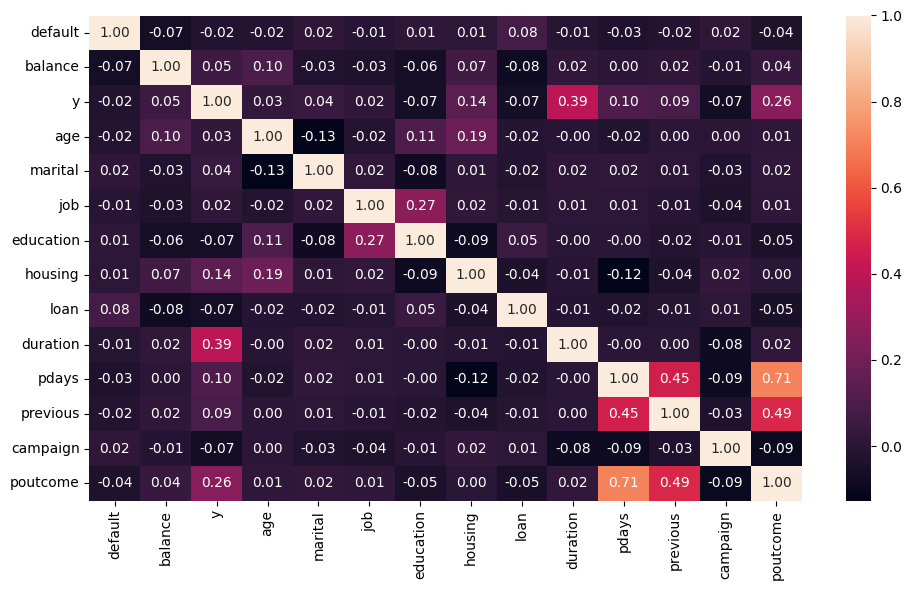

In [59]:
df2["default"] = pd.factorize(df2["default"])[0]
df2["marital"] = pd.factorize(df2["marital"])[0]
df2["education"] = pd.factorize(df2["education"])[0]
df2["job"] = pd.factorize(df2["job"])[0]
df2["housing"] = pd.factorize(df2["housing"])[0]
df2["loan"] = pd.factorize(df2["loan"])[0]
df2["y"] = pd.factorize(df2["y"])[0]
df2["poutcome"] = pd.factorize(df2["poutcome"])[0]


fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df2[["default", "balance","y", "age", "marital", "job", "education", "housing", "loan", "duration", "pdays", "previous", "campaign","poutcome"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

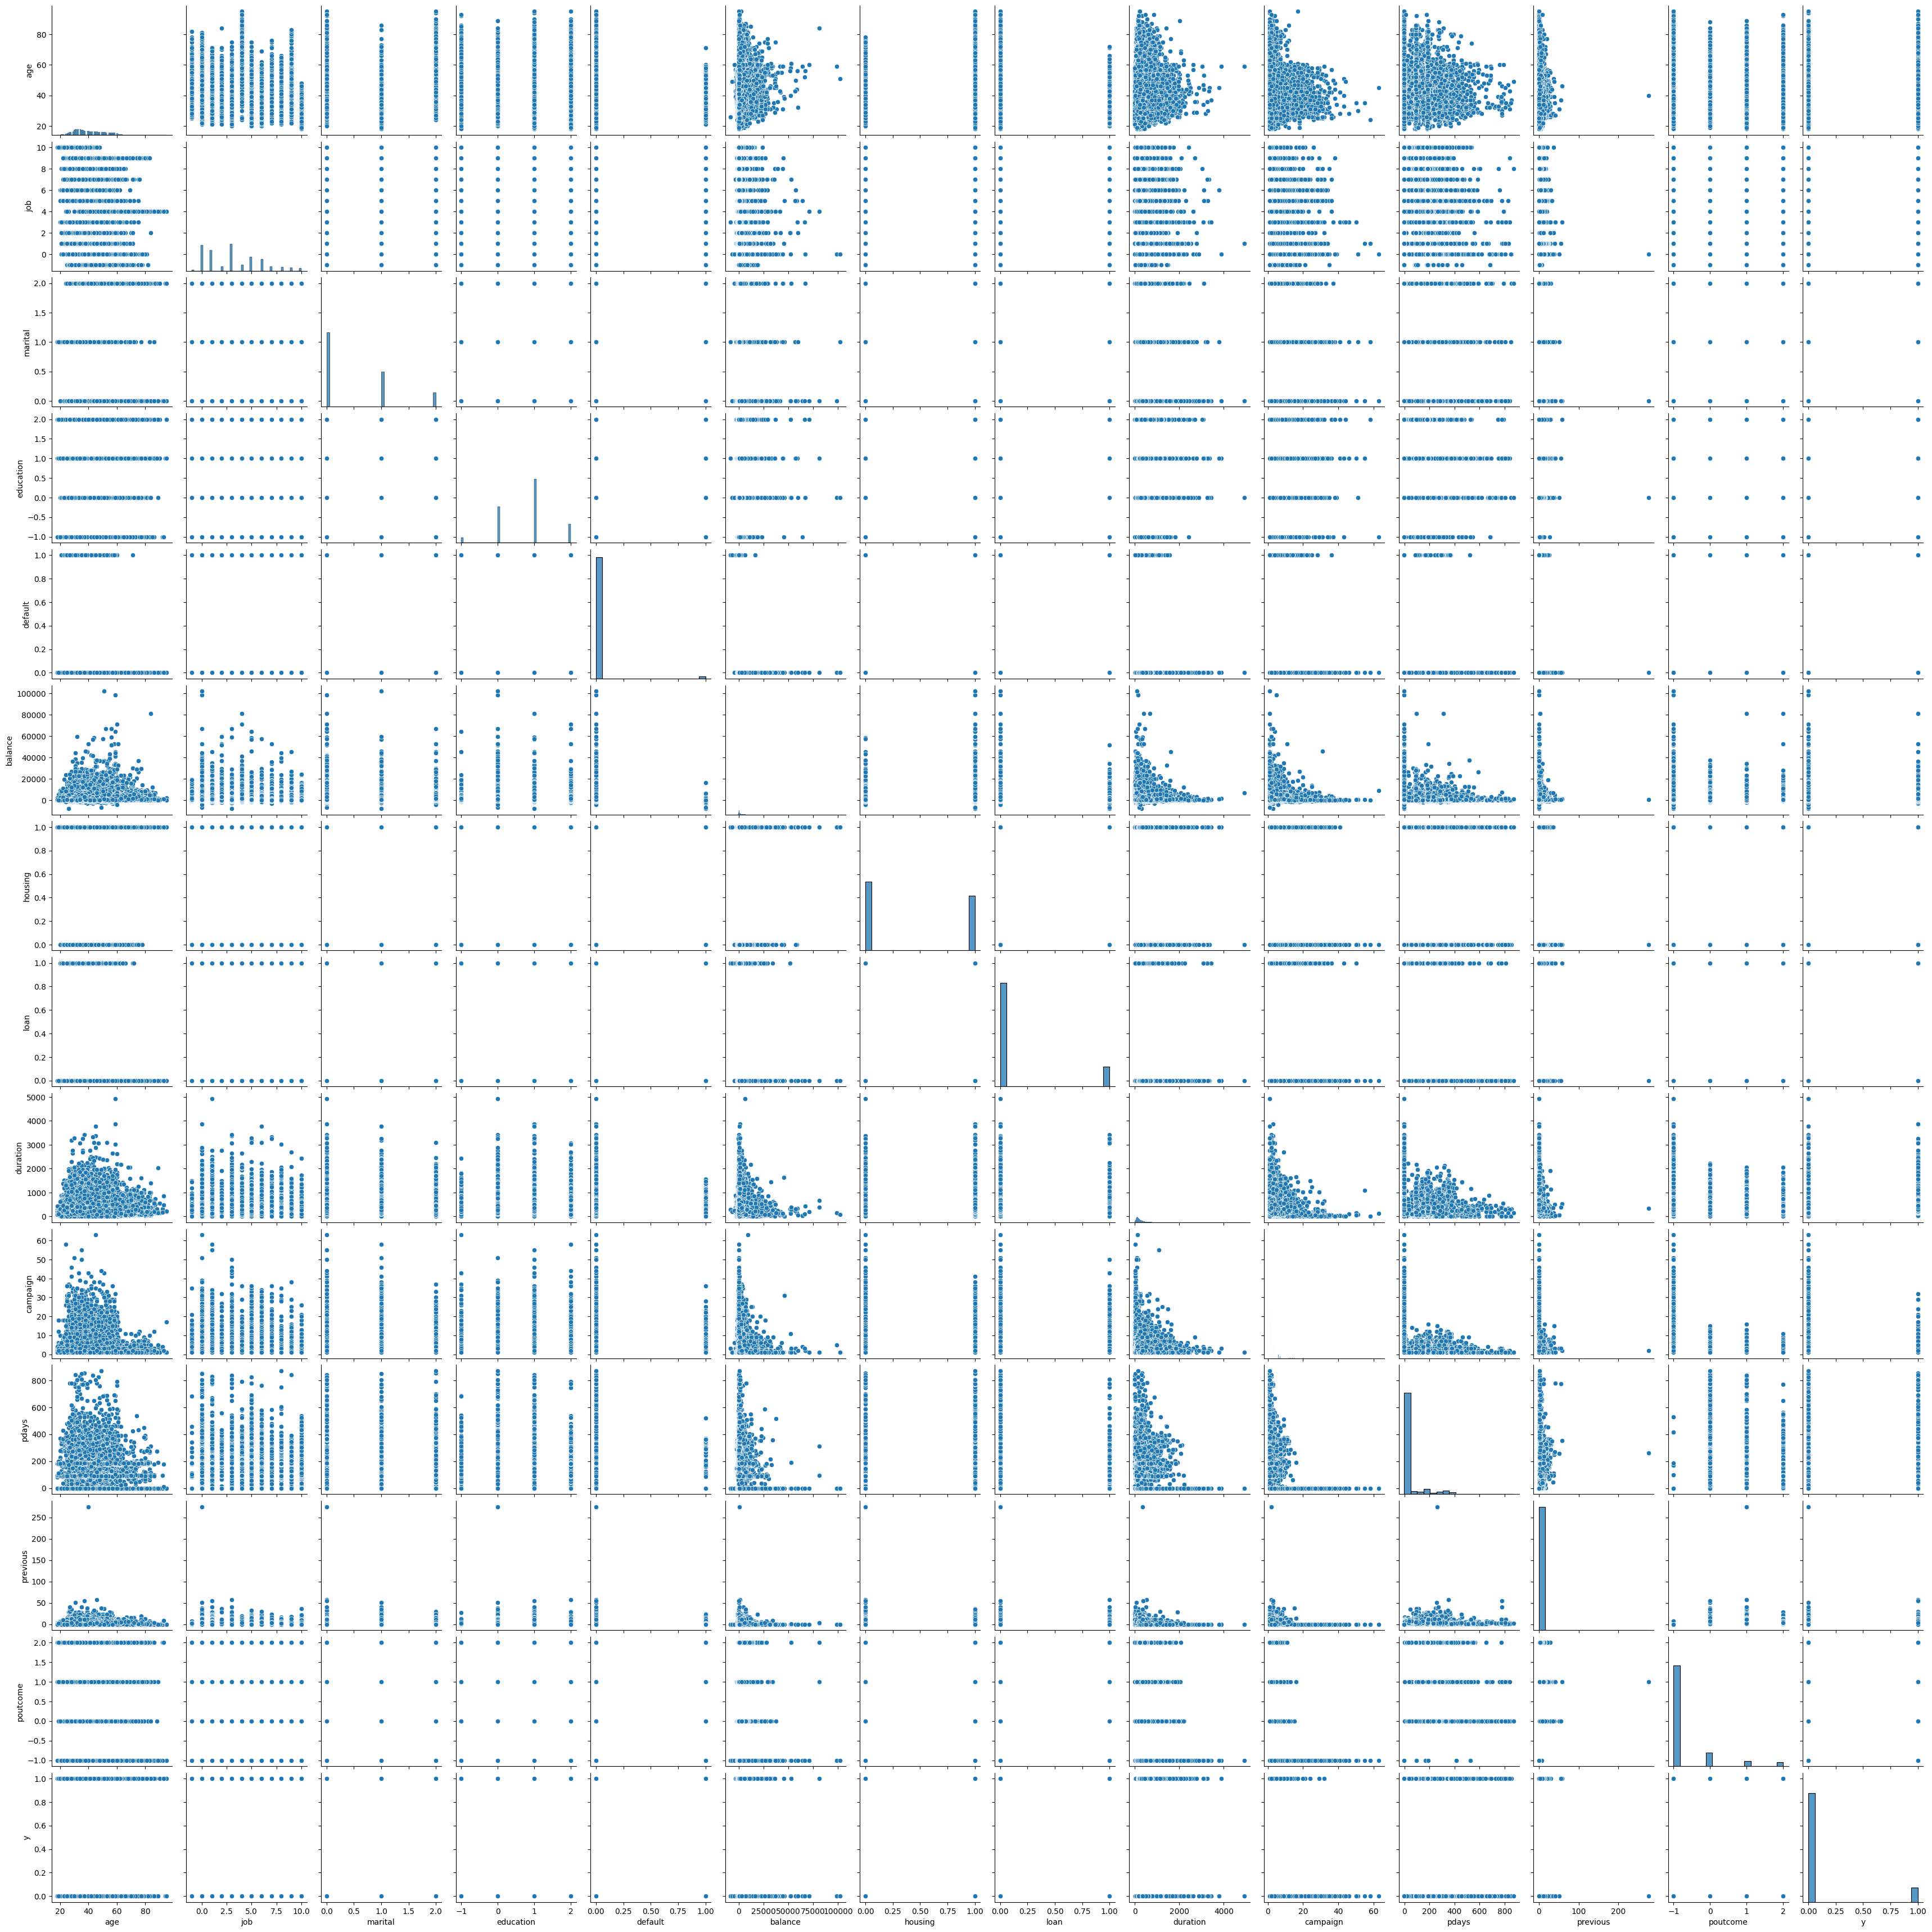

In [60]:
sns.pairplot(data = df2)

Definir los datos "x"

In [ ]:

X = df2.drop("y", axis = 1)

In [62]:
df["y"] = pd.factorize(df["y"])[0]

In [63]:
y = df["y"]

Division de los datos para entrenamiento

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome
3344,41,3,0,2,0,849,0,0,72,1,-1,0,-1
17965,49,1,0,2,0,1415,0,0,269,2,-1,0,-1
18299,42,5,0,1,0,3842,1,0,130,4,-1,0,-1
10221,37,0,1,0,0,-119,0,0,375,11,-1,0,-1
32192,56,3,0,2,0,3498,1,0,264,2,-1,0,-1


In [66]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome
3776,40,3,0,1,0,580,0,0,192,1,-1,0,-1
9928,47,6,1,1,0,3644,1,0,83,2,-1,0,-1
33409,25,10,1,0,0,538,0,0,226,1,-1,0,-1
31885,42,0,0,0,0,1773,1,0,311,1,336,1,0
15738,56,0,0,0,0,217,1,1,121,2,-1,0,-1


In [67]:
y_train.value_counts()

y
0    31970
1     4198
Name: count, dtype: int64

In [68]:
y_test.value_counts()

y
0    7952
1    1091
Name: count, dtype: int64

Algoritmo de regresión logística

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Crear una instancia del modelo de regresión logística
model_log = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
model_log.fit(X_train, y_train)

# Realizar predicciones con los datos de prueba
y_pred_log = model_log.predict(X_test)

/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
print (y_pred_log)

[0 0 0 ... 0 0 0]


 Calcular la exactitud del modelo de regresión logística

In [71]:

accuracy_log = accuracy_score(y_test, y_pred_log)
print (round(accuracy_log, 4))

0.8936
